
<a href="https://colab.research.google.com/github/umairimran/bigDataProject/blob/main/big_data_edge_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/bigDataProject.zip"
!unzip "/content/drive/MyDrive/pretrained_model.zip"
!pip install sparknlp
!pip install nltk
!pip install pyspark
!pip install Transformer
!pip install streamlit
!pip install opencv-python
!pip install torch
!pip install numpy
!pip install scipy
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.ml.feature import CountVectorizer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col





MessageError: Error: credential propagation was unsuccessful

In [ ]:
def calculatesentiment(text):
    MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained("tokenizer")
    config = AutoConfig.from_pretrained("sentiment_model")
    model = AutoModelForSequenceClassification.from_pretrained("sentiment_model")

    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output.logits.detach().numpy()
    scores = softmax(scores)

    # Find the index of the label with the highest probability
    max_index = np.argmax(scores)

    # Retrieve the corresponding sentiment label
    max_label = config.id2label[max_index]

    return max_label

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the sentiment analysis function
def calculate_sentiment(row):
    # Ensure row is a list of strings
    if isinstance(row, list):
        text = '[' + ', '.join(row) + ']'  # Convert the list of strings into the required format
    else:
        return None

    # Your sentiment analysis logic here
    sentiment = calculatesentiment(text)

    return sentiment

# Define a UDF for sentiment analysis
sentiment_udf = udf(calculate_sentiment, StringType())




In [ ]:

from pyspark.sql.types import StructType, StructField, StringType, DateType, IntegerType, LongType
from pyspark.sql.functions import input_file_name

# Define custom schema
customSchema = StructType([
    StructField("userName", StringType(), True),
    StructField("date", DateType(), True),
    StructField("#retweets", IntegerType(), True),
    StructField("#favorites", StringType(), True),
    StructField("text", StringType(), True),
    StructField("geo", StringType(), True),
    StructField("#mentions", StringType(), True),
    StructField("#hashtags", StringType(), True),
    StructField("id", LongType(), True),
    StructField("permalink", StringType(), True)
])

# Function to read CSV files and return a DataFrame
def read_csv_files(path):
    return spark.read.format("csv") \
        .option("header", "true") \
        .option("sep", ";") \
        .schema(customSchema) \
        .load(path) \




In [ ]:

import  pyspark
from pyspark.sql.functions import input_file_name
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Create SparkSession
spark = SparkSession.builder.master("local[*]") \
    .appName("New App") \
    .getOrCreate()



In [ ]:
df=spark.read.csv("bitcoin-tweets-2021.csv",header=True, inferSchema=True)
df2=spark.read.csv("bitcoin-tweets-2022.csv",header=True, inferSchema=True)
df3=spark.read.csv("BitcoinTweets.csv",header=True, inferSchema=True)
df4=spark.read.csv("BTC_Tweets.csv",header=True, inferSchema=True)
df5=spark.read.csv("tweets-1.csv",header=True, inferSchema=True)
df6=spark.read.csv("tweets-2.csv",header=True, inferSchema=True)
df7=spark.read.csv("tweets-3.csv",header=True, inferSchema=True)
df8=spark.read.csv("tweets-4.csv",header=True, inferSchema=True)
df9=spark.read.csv("tweets-5.csv",header=True, inferSchema=True)
df10=spark.read.csv("tweets-6.csv",header=True, inferSchema=True)

In [ ]:
# # df.printSchema()
# # df2.printSchema()
# # df3.printSchema()
# # df4.printSchema()
# # df5.printSchema()
# # df6.printSchema()
# # df7.printSchema()
# # df8.printSchema()
# # df9.printSchema()
# df10=df10.select( "Tweet Posted Time","Tweet Content","Retweets Received","Likes Received","Tweet Language")
# df10.printSchema()
# df10.count()


+--------------------+--------------+--------------------+
|            datetime|      username|                text|
+--------------------+--------------+--------------------+
|2021-01-01 23:59:...|    WoodooProd|Crypto adoption i...|
|https://t.co/4sYr...|          NULL|                NULL|
|#Bitcoin #Altcoin...|          NULL|                NULL|
|2021-01-01 23:59:...|   YSojourners|Ripple Executive ...|
|2021-01-01 23:59:...|      Andama_n|@hextoysofficial ...|
|2021-01-01 23:59:...|   YSojourners|FUN and Games: Al...|
|2021-01-01 23:59:...|      HunnerSa|I bought #Bitcoin...|
|#Bitcoin under 50...|          NULL|                NULL|
|2021-01-01 23:59:...|   WGeorgeCook|@tedneward This b...|
|2021-01-01 23:59:...|TheCryptoKuber|@chainlink is goi...|
+--------------------+--------------+--------------------+



In [ ]:
df11= read_csv_files("tweets.csv")
df=df.select("text")
df2=df2.select("text")
df3=df3.select("text")
df4=df4.select("Tweet_Text")

df5=df5.select("Tweet Content")
df6=df6.select("Tweet Content")
df7=df7.select("Tweet Content")
df8=df8.select("Tweet Content")
df9=df9.select("Tweet Content")
df10=df10.select("Tweet Content")
df11=df11.select("text")


+--------------------+
|                text|
+--------------------+
|Crypto adoption i...|
|                NULL|
|                NULL|
|Ripple Executive ...|
|@hextoysofficial ...|
|FUN and Games: Al...|
|I bought #Bitcoin...|
|                NULL|
|@tedneward This b...|
|@chainlink is goi...|
+--------------------+



In [ ]:
dfs=[df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]
# dfs=df5

# dfs = dfs.withColumnRenamed("Tweet Content", "text")
from functools import reduce
# Combine all DataFrames into one
df = reduce(lambda df1, df2: df1.union(df2), dfs)


main_df=df


+--------------------+
|                text|
+--------------------+
|Crypto adoption i...|
|                NULL|
|                NULL|
|Ripple Executive ...|
|@hextoysofficial ...|
|FUN and Games: Al...|
|I bought #Bitcoin...|
|                NULL|
|@tedneward This b...|
|@chainlink is goi...|
+--------------------+
only showing top 10 rows



In [ ]:

import string
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import lower
from pyspark.sql.functions import concat_ws, regexp_replace
from pyspark.sql.functions import regexp_replace, trim
def removePunctuations(df, column_name):
    df = df.select("text", regexp_replace("text", "[^0-9a-zA-Z_\-|]+:&.", " ").alias('replaced_str'))
    df=df.select("replaced_str")
    df=df.withColumnRenamed("replaced_str","text")


    return df

def removeUsernames(df, column_name):
    # Concatenate the array elements into a single string column
    df = df.withColumn("concatenated_text", concat_ws(" ", column_name))

    # Replace @username mentions with an empty string
    df = df.withColumn("processed_text", regexp_replace("concatenated_text", r'@\w+', ''))

    # Drop the intermediate column
    df = df.drop("concatenated_text")


    return df
def cleaning(df):
    df = df.withColumn("text", lower(df["text"]))

    df = df.dropna(how='any', thresh=None, subset=None)

    df=removeUrl(df)
    df=removeEmojis(df)
    df = removePunctuations(df, "text")

    df= removeUsernames(df, 'text')

    df=df.select("processed_text")
    df = df.withColumnRenamed("processed_text", "text")
    df=tokenization(df)
    df=removeStopWords(df)
    # Assuming you have a DataFrame named 'df' and you want to rename a column 'old_column_name' to 'new_column_name'




    return df
def removeEmojis(df):
    import pyspark.sql.functions as fn

    # Define a regular expression pattern to match emojis
    emoji_pattern = r'[^\w\s,]'

    # Use regexp_replace to remove emojis from the text column
    df = df.withColumn("text", fn.regexp_replace("text", emoji_pattern, ""))

    return df
def removeStopWords(df):
    import nltk
    from nltk.corpus import stopwords
    from pyspark.ml.feature import StopWordsRemover

    # Download NLTK stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Initialize StopWordsRemover
    remover = StopWordsRemover(inputCol="text", outputCol="filtered_text", stopWords=list(stop_words))

    # Transform DataFrame to remove stop words
    df = remover.transform(df)
    df=df.select("filtered_text")
    df=df.withColumnRenamed("filtered_text","text")

    return df
def removeUrl(df):
    from pyspark.sql.functions import regexp_replace
    df = df.withColumn("text", regexp_replace(df["text"], r"https?://\S+|www\.\S+", ""))
    return df

def stemming(df):
    from pyspark.ml import Pipeline
    from sparknlp.annotator import Stemmer, LemmatizerModel
    from sparknlp.base import DocumentAssembler

    # Initialize the annotators
    document_assembler = DocumentAssembler() \
        .setInputCol("text") \
        .setOutputCol("document")

    stemmer = Stemmer() \
        .setInputCols(["document"]) \
        .setOutputCol("stem")

    lemmatizer = LemmatizerModel.pretrained() \
        .setInputCols(["document"]) \
        .setOutputCol("lemma")

    # Create the pipeline
    pipeline = Pipeline(stages=[document_assembler, stemmer, lemmatizer])

    # Fit the pipeline to the DataFrame
    model = pipeline.fit(df)

    # Transform the DataFrame
    result = model.transform(df)

    return result

def lemmatization(df):
    return df
def tokenization(df):
    from pyspark.ml.feature import Tokenizer
    tokenizer=Tokenizer(inputCol= 'text', outputCol='words_token')
    df_tokenized=tokenizer.transform(df)
    df_tokenized=df_tokenized.select("words_token")
    df_tokenized=df_tokenized.withColumnRenamed("words_token","text")
    return df_tokenized
def TextNormalization(df):
    return df

In [ ]:
lower_df=cleaning(df)
from pyspark.sql.functions import col
from pyspark.sql.functions import col, size
sentiment_df = lower_df.withColumn('sentiment', sentiment_udf(lower_df.text))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pyspark.sql.functions import when

# Assuming sentiment_df is your DataFrame with a column named 'sentiment'
df_labeled = sentiment_df.withColumn("label",
                                     when(sentiment_df["sentiment"] == "neutral", 0)
                                     .when(sentiment_df["sentiment"] == "positive", 1)
                                     .when(sentiment_df["sentiment"] == "negative", 2)
                                     .otherwise(None))




# **Training of the model with the logistic regression**

In [ ]:
df_labeled.limit(1000).show()

+--------------------+---------+-----+
|                text|sentiment|label|
+--------------------+---------+-----+
|[crypto, adoption...|  neutral|    0|
|[ripple, executiv...|  neutral|    0|
|[hextoysofficial,...|  neutral|    0|
|[fun, games, altc...|  neutral|    0|
|[bought, bitcoin,...|  neutral|    0|
|[tedneward, bette...|  neutral|    0|
|[chainlink, going...|  neutral|    0|
|[ibanksmore, came...|  neutral|    0|
|[santiagoaufund, ...|  neutral|    0|
|[frances_coppola,...|  neutral|    0|
|[gotcha, xrp, bit...|  neutral|    0|
|[must, watch, int...|  neutral|    0|
|           [pgreen3]|  neutral|    0|
|[knoidea1, bitcoi...| negative|    2|
|[btcaaron, bitcoi...|  neutral|    0|
|[it_airmass, came...| negative|    2|
|[bitcoin, price, ...|  neutral|    0|
|[collective, barg...|  neutral|    0|
|[fucking, around,...| negative|    2|
|[bitcointina, pet...|  neutral|    0|
+--------------------+---------+-----+
only showing top 20 rows



In [ ]:
df_to_train=df_labeled.limit(1000)
vectorizer = CountVectorizer(inputCol="text", outputCol="features")
vectorized_data = vectorizer.fit(df_to_train).transform(df_to_train)
vectorized_data.select("text", "features", "sentiment")
label_mapping = {
    "neutral": 0,
    "positive": 1,
    "negative": 2
}
vectorized_data = vectorized_data.withColumn("label",
                   when(vectorized_data["sentiment"] == "neutral", 0)
                   .when(vectorized_data["sentiment"] == "positive", 1)
                   .otherwise(2))
vectorized_data.show()


Evaluating the metrices of logistic regression


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
df=vectorized_data

# Assuming 'df' is your DataFrame
df_2000 = df.limit(1).show()  # Take the first 2000 rows

# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df_2000.toPandas()

# Write Pandas DataFrame to Excel file
excel_file_path = "vectorized_data.xlsx"
df_pandas.to_excel(excel_file_path, index=False)

print("Excel file saved successfully.")


In [ ]:
df=vectorized_data

# Assuming 'df' is your DataFrame
df_2000 = df.limit(2000)  # Take the first 2000 rows

# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df_2000.toPandas()

# Write Pandas DataFrame to Excel file
excel_file_path = "vectorized_data.xlsx"
df_pandas.to_excel(excel_file_path, index=False)

print("Excel file saved successfully.")
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)
df = df.withColumn("label", df["label"].cast("double"))
lr = LogisticRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
print("Accuracy:", accuracy)
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
print("F1 Score:", f1_score)
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
print("Precision:", precision)
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
print("Recall:", recall)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(accuracy)

1.0


In [ ]:
# Calculate precision, recall, and F1-score
predictionAndLabels = predictions.select("prediction", "label").rdd

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Calculate precision, recall, and F1-score
predictionAndLabels = predictions.select("prediction", "label").rdd

# Convert label to float
predictionAndLabels = predictionAndLabels.map(lambda lp: (float(lp.prediction), float(lp.label)))

metrics = MulticlassMetrics(predictionAndLabels)

# Find the mode class
labels_counts = predictionAndLabels.map(lambda x: (x[1], 1)).reduceByKey(lambda x, y: x + y).collect()
mode_class = max(labels_counts, key=lambda x: x[1])[0]  # Get the label with maximum count

precision = metrics.precision(mode_class)  # Precision for the mode class
recall = metrics.recall(mode_class)  # Recall for the mode class
f1Score = metrics.fMeasure(mode_class)  # F1-score for the mode class

print("Accuracy:", accuracy)
print("Precision for mode class:", precision)
print("Recall for mode class:", recall)
print("F1-score for mode class:", f1Score)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy: 1.0
Precision for mode class: 1.0
Recall for mode class: 1.0
F1-score for mode class: 1.0


Now using naive byes to train data


In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
train_data = vectorized_data.select("features", "label")
test_data = vectorized_data.select("features", "label")
train_data, test_data = train_data.randomSplit([0.8, 0.2], seed=123)
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
nb_model = nb.fit(train_data)
predictions = nb_model.transform(test_data)

In [ ]:
predictions.show()

+--------------------+-----+--------------------+-----------+----------+
|            features|label|       rawPrediction|probability|prediction|
+--------------------+-----+--------------------+-----------+----------+
|      (70,[0],[1.0])|    0|[-3.1570004211501...|      [1.0]|       0.0|
|      (70,[0],[1.0])|    0|[-3.1570004211501...|      [1.0]|       0.0|
|(70,[2,12,49],[2....|    1|[-19.795039561512...|      [1.0]|       0.0|
|(70,[6,9,32,50],[...|    0|[-19.795039561512...|      [1.0]|       0.0|
|     (70,[29],[1.0])|    0|[-4.948759890378168]|      [1.0]|       0.0|
+--------------------+-----+--------------------+-----------+----------+



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)
predictionAndLabels = predictions.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)
precision = metrics.precision(label_mapping.keys())
print("Precision:", precision)
recall = metrics.recall(label_mapping.keys())
print("Recall:", recall)
f1_score = metrics.fMeasure()
print("F1 Score:", f1_score)

Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'dict_keys'

EDA Of data using spark sql


In [ ]:
logistic_regression_df.createOrReplaceTempView("logistic_regression_df")
sentiments_counts=spark.sql('select sentiment,count(*) as count from logistic_regression_df group by sentiment')

top_keywords = spark.sql("""
    SELECT word, COUNT(*) AS count
    FROM (
        SELECT EXPLODE(text) AS word
        FROM logistic_regression_df
    )
    GROUP BY word
    ORDER BY count DESC
""")
top_keywords.show()

+---------+-----+
|sentiment|count|
+---------+-----+
|  neutral|    5|
+---------+-----+



In [ ]:
sentiments_counts.show()

+---------+-----+
|sentiment|count|
+---------+-----+
|  neutral|    5|
+---------+-----+



Task 2 visulization

In [ ]:
sentiment_counts_df = sentiments_counts.toPandas()
import matplotlib.pyplot as plt

In [ ]:
plt.bar(sentiment_counts_df['sentiment'], sentiment_counts_df['count'], color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts_df['count'], labels=sentiment_counts_df['sentiment'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Sentiment Scores')
plt.show()

Word cloud

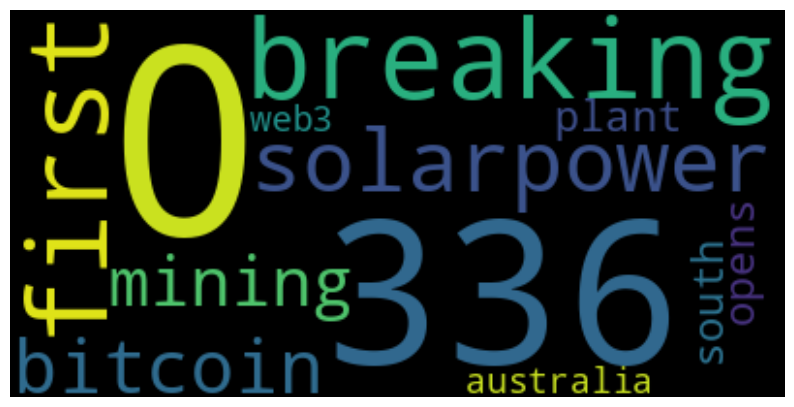

In [ ]:
from wordcloud import WordCloud
word_counts_dict = top_keywords.rdd.collectAsMap()
# Create the WordCloud object
wordcloud = WordCloud().generate_from_frequencies(word_counts_dict)
# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Bekeh visulization

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Extract data from Spark DataFrame
sentiments = sentiments_counts.select("sentiment").rdd.flatMap(lambda x: x).collect()
counts = sentiments_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(sentiments=sentiments, counts=counts))

# Create a bar graph
p = figure(x_range=sentiments, plot_height=400, title="Sentiment Counts", toolbar_location=None, tools="")

p.vbar(x='sentiments', top='counts', width=0.9, source=source)

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0

# Show the plot
show(p)


AttributeError: unexpected attribute 'plot_height' to figure, similar attributes are outer_height, height or min_height

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Extract data from Spark DataFrame
sentiments = sentiments_counts.select("sentiment").rdd.flatMap(lambda x: x).collect()
counts = sentiments_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(sentiments=sentiments, counts=counts))

# Create a pie plot
p = figure(plot_height=350, title="Sentiment Distribution", toolbar_location=None,
           tools="hover", tooltips="@sentiments: @counts", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=0, end_angle=360,
        line_color="white", fill_color=['red', 'green', 'blue'],
        legend_field='sentiments', source=source)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

# Show the plot
show(p)


AttributeError: unexpected attribute 'plot_height' to figure, similar attributes are outer_height, height or min_height

Plotly Visulization

In [ ]:
!pip install plotly
import plotly.graph_objects as go

# Extract data from Spark DataFrame
sentiments = sentiments_counts.select("sentiment").rdd.flatMap(lambda x: x).collect()
counts = sentiments_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Create pie plot
fig = go.Figure(data=[go.Pie(labels=sentiments, values=counts)])

# Customize layout
fig.update_layout(title="Sentiment Distribution")

# Show the plot
fig.show()
